In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def plotSensor(array: iter, title: str, x_label: str, y_label: str):
    x = np.linspace(-40, 40, num=17)
    plt.figure(figsize=(10,4))
    for i in range(0, 8):
        plt.plot(x, array[:,i], marker='o', label=f'S{i}')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

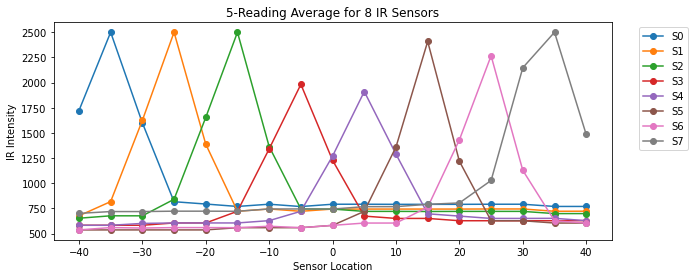

In [11]:
file_dir = '../Documentation/Calibration/sensorcalibration_28042022_2249.txt'

# (5*11) x 9 array generated
data_raw = np.genfromtxt(file_dir, delimiter=',')
# Remove empty 9th row, now (5*11) x 8 array
data_raw = np.delete(data_raw, 8, 1)

# Calculate means of every 5 rows
# 11 x 8 array of means
data_mean = np.empty((17, 8))
for i in range(17):
    data_mean[i] = np.mean(data_raw[5*i:5*i+5], 0)
#print(data_mean)

# Plot
plotSensor(data_mean, '5-Reading Average for 8 IR Sensors', 'Sensor Location', 'IR Intensity')

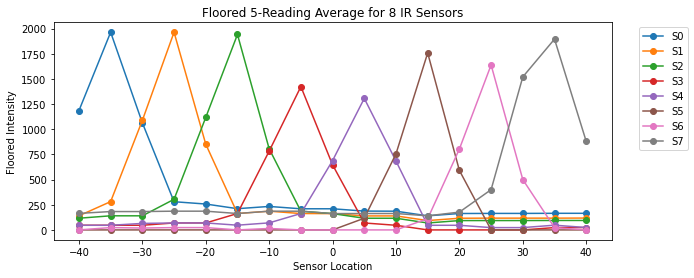

In [12]:
# Normalization

# Flooring
data_min = np.amin(data_mean, 1)
#print(data_min)
data_floor = data_mean.copy()
for idx, subtrahend in enumerate(data_min):
    data_floor[idx] -= subtrahend
plotSensor(data_floor, 'Floored 5-Reading Average for 8 IR Sensors', 'Sensor Location', 'Floored Intensity')

[1185.  1964.  1088.  1964.  1117.8 1941.8  806.  1423.8  688.8 1306.8
  756.  1758.   804.2 1639.  1520.2 1895.8  880. ]


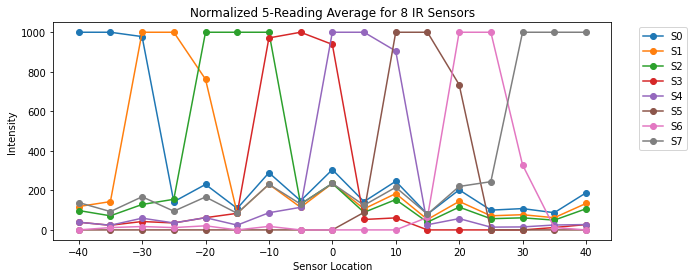

In [13]:
# Max scaling
data_max = np.max(data_floor, 1)
print(data_max)
data_norm = data_floor.copy()
for idx, subtrahend in enumerate(data_max):
    data_norm[idx] /= data_max[idx]
    data_norm[idx] *= 1000
plotSensor(data_norm, 'Normalized 5-Reading Average for 8 IR Sensors', 'Sensor Location', 'Intensity')

In [15]:
# Applying Weights

# Distance errors (mm)
errors = np.linspace(-40, 40, num=17)

# Weights
weights = [-8, -4, -2, -1, 1, 2, 4, 8]
weights = [num / 4. for num in weights]

print(data_norm[0])
print(np.sum(np.multiply(data_norm[0], weights)))

for row in data_norm:
    print(np.sum(np.multiply(row, weights)))

[1000.          118.31223629   98.05907173   38.98734177   38.98734177
    0.            0.          138.56540084]
-1890.2109704641348
-1890.2109704641348
-1981.3136456211814
-2663.6029411764703
-1161.3543788187371
-1368.491680085883
-648.3159954681223
-1051.1166253101735
-434.7871892119679
-476.7711962833912
93.7021732476278
389.6164021164021
497.3833902161547
1214.1258393434468
1191.732763880415
2009.5053282462834
1754.7209621268066
1437.7272727272725
